This notebook demonstrates the use of regularization and depolarizing noise mitigation options for fidelity quantum kernels (FQKs) as described in http://arxiv.org/pdf/2105.02276v1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn.encoding_circuit import QEKEncodingCircuit
from squlearn.kernel.matrix import FidelityKernel
from squlearn.kernel.ml import QKRR
from squlearn.util import Executor

In [2]:
# generate some training and test data
x = np.linspace(-0.8, 0.8, 20)
x_fine = np.linspace(-0.9, 0.9, 200)
y = np.sin(10.0 * x) * np.cos(np.exp(2 * x))

In [3]:
# define the encoding circuit
num_qubits = 10
enc_circuit = QEKEncodingCircuit(num_qubits, num_features=1, num_layers=2)

In [4]:
# Define the executor and set the desired number of shots
executor = Executor("qasm_simulator")
executor.set_shots(1000)

##### Demonstrating regularization options in QKRR

In [5]:
# Define the FQK and assign the respective parameters
qkernel = FidelityKernel(enc_circuit, executor=executor, parameter_seed=10)

# Set the QKRR instance and with
qkrr_inst = QKRR(
    quantum_kernel=qkernel, alpha=1e-1, regularize="thresholding"
)  # the alternative option would be 'tikhonov'
qkrr_inst.fit(x.reshape(-1, 1), y)
y_pred = qkrr_inst.predict(x_fine.reshape(-1, 1))

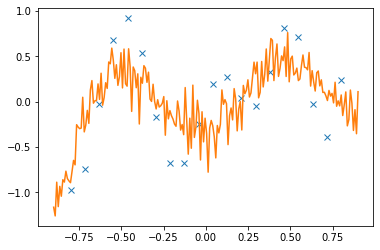

In [6]:
# Plot the results
plt.plot(x, y, "x")
plt.plot(x_fine, y_pred)

##### Demonstrating depolarizing noise mitigation for fidelity quantum kernels

In [7]:
# Set the FQK with the option of mit_depol_noise
# Since we are using only a qasm_simulator this option is in principal useless,
# however, in this case we demonstrate the availability of this option and it's main effect,
# i.e. restoring ones on the diagonal
kernel_mit = FidelityKernel(
    enc_circuit, executor=executor, mit_depol_noise="msplit", parameter_seed=10
)  # the alternative option would be 'mmean'
kernel_mit.evaluate(x.reshape(-1, 1))

array([[ 1.00000000e+00,  9.61168542e-01,  8.93707277e-01,
         7.85617422e-01,  6.71237798e-01,  5.59936123e-01,
         4.34546894e-01,  3.33087363e-01,  2.52289631e-01,
         1.64601258e-01,  1.19321198e-01,  7.96983942e-02,
         5.86362251e-02,  3.33838820e-02,  2.16779060e-02,
         1.38774733e-02,  8.58005898e-03,  7.87668884e-04,
         2.85622713e-04, -9.01927272e-04],
       [ 9.61168542e-01,  1.00000000e+00,  9.61441053e-01,
         8.76912186e-01,  8.04867325e-01,  6.77934961e-01,
         5.57668720e-01,  4.58674143e-01,  3.46641259e-01,
         2.70914710e-01,  1.82218093e-01,  1.25693432e-01,
         9.53560529e-02,  5.90681081e-02,  4.29606586e-02,
         1.65980374e-02,  8.47535697e-03,  4.85123409e-04,
         1.86744518e-03,  2.46733104e-03],
       [ 8.93707277e-01,  9.61441053e-01,  1.00000000e+00,
         9.63770922e-01,  9.13886565e-01,  8.13131551e-01,
         7.05106845e-01,  5.82404178e-01,  4.56634419e-01,
         3.70572279e-01,  2.6

In [8]:
# Compare to the kernel without this option (subtracting identiy necessary due to inherent regularization of QKRR)
print(qkrr_inst.k_train - 1e-1 * np.eye(np.shape(qkrr_inst.k_train)[0]))

[[ 1.00546870e+00  9.72789983e-01  8.94910374e-01  8.16330647e-01
   6.94952970e-01  5.59381572e-01  4.50529149e-01  3.36566336e-01
   2.49933264e-01  1.80085342e-01  1.11590144e-01  8.99509843e-02
   5.42663214e-02  3.34976742e-02  1.76567085e-02  5.84688185e-03
   4.54322987e-03  2.27958707e-03  2.28572135e-03  3.44955863e-04]
 [ 9.72789983e-01  1.01015712e+00  9.71288192e-01  9.07345755e-01
   8.15251488e-01  6.96648669e-01  5.92963128e-01  4.68662999e-01
   3.64561054e-01  2.49531570e-01  1.75896198e-01  1.27512617e-01
   8.66037754e-02  5.67526562e-02  3.42724975e-02  1.91304145e-02
   1.07225675e-02  9.77799941e-03  2.85131434e-03 -1.03979200e-03]
 [ 8.94910374e-01  9.71288192e-01  1.00510607e+00  9.69586102e-01
   9.11198913e-01  8.10299694e-01  7.21392202e-01  6.04903960e-01
   4.92157517e-01  3.64684415e-01  2.78911259e-01  2.10781510e-01
   1.42797566e-01  1.01626323e-01  6.53253186e-02  5.06127509e-02
   2.14196937e-02  1.49780756e-02  8.41269270e-03 -4.44736947e-05]
 [ 8.16